In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [4]:
df= pd.read_csv("spam (1).csv")

In [5]:
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
df.tail(5)

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [24]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 0:1]


# Visualize the class Distribution

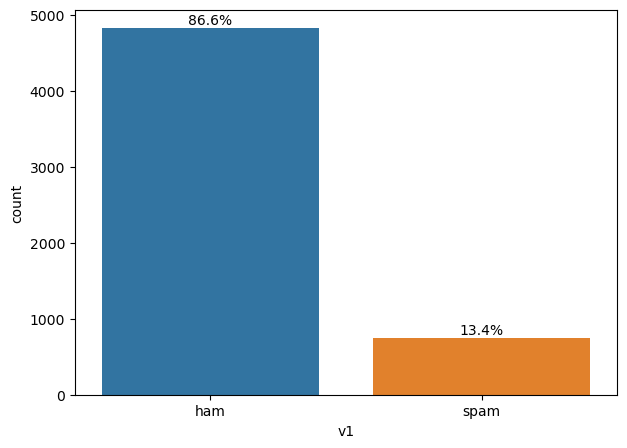

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x="v1", data=df)
   
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(X))
    x_countplot = p.get_x() + p.get_width()/2
    y_countplot = p.get_height()+ 50
    ax.annotate(percentage, (x_countplot, y_countplot), ha='center')
plt.show()

We can see that there's huge differences in class distribution,where the majority of data is 
ham (86.6%) and only 13.4% are spam

Split the training and testing set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values.ravel(),
    y.values.ravel(),
    test_size=0.20,
    random_state=42)
  

Feature Extraction

In [34]:
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()


# Model Training

In [40]:
clf_method = KNeighborsClassifier()

clf_count_vectorizer = Pipeline([
    ('vectorizer', count_vectorizer),
    ('classifier', clf_method)
])

clf_count_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [45]:
clcf_tfidf_vectorizer = Pipeline([
    ('vectorizer',tfidf_vectorizer),
])
clf_tfidf_vectorizer.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [50]:
y_train_pred_cvect = clf_count_vectorizer.predict(X_train)
y_train_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_train)

print(f"Train Accuracy using Count Vectorizer: {accuracy_score(y_train, y_train_pred_cvect):.3f}")
print(f"Train Accuracy using TF-IDF Vectorizer: {accuracy_score(y_train, y_train_pred_tfidf_vect):.3f}")

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy using Count Vectorizer: 0.932
Train Accuracy using TF-IDF Vectorizer: 0.920


In [51]:
print(classification_report(y_train,y_train_pred_cvect))

              precision    recall  f1-score   support

         ham       0.93      1.00      0.96      3860
        spam       1.00      0.49      0.66       597

    accuracy                           0.93      4457
   macro avg       0.96      0.74      0.81      4457
weighted avg       0.94      0.93      0.92      4457



In [53]:
print(classification_report(y_train,y_train_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96      3860
        spam       1.00      0.41      0.58       597

    accuracy                           0.92      4457
   macro avg       0.96      0.70      0.77      4457
weighted avg       0.93      0.92      0.91      4457



# Model Evaluation

In [54]:
y_test_pred_cvect = clf_count_vectorizer.predict(X_test)
y_test_pred_tfidf_vect = clf_tfidf_vectorizer.predict(X_test)

print(f"Test Accuracy using Count Vectorizer: {accuracy_score(y_test, y_test_pred_cvect):.3f}")
print(f"Test Accuracy using TF-IDF Vectorizer: {accuracy_score(y_test, y_test_pred_tfidf_vect):.3f}")

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Test Accuracy using Count Vectorizer: 0.919
Test Accuracy using TF-IDF Vectorizer: 0.916


In [55]:
print(classification_report(y_test,y_test_pred_cvect))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       965
        spam       1.00      0.40      0.57       150

    accuracy                           0.92      1115
   macro avg       0.96      0.70      0.76      1115
weighted avg       0.93      0.92      0.90      1115



In [58]:
print(classification_report(y_test,y_test_pred_tfidf_vect))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.95       965
        spam       1.00      0.37      0.54       150

    accuracy                           0.92      1115
   macro avg       0.96      0.69      0.75      1115
weighted avg       0.92      0.92      0.90      1115



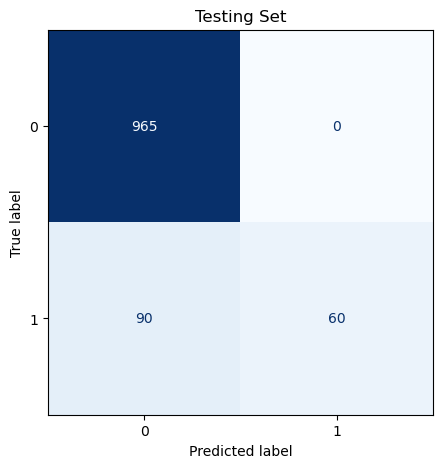

In [66]:
conf_mat_train = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred_cvect))

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_title('Testing Set')
conf_mat_train.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False);

# Conclusion


Based on the results of the machine learning project, it can be concluded that using CountVectorizer with KNN classifier outperforms TF-IDF Vectorizer with KNN in terms of accuracy. The model achieved an accuracy of 0.932 on the training set and 0.919 on the test set, compared to an accuracy of 0.920 on the training set and 0.916 on the test set achieved by the TF-IDF Vectorizer with KNN. Therefore, it can be concluded that the CountVectorizer with KNN model is more reliable and accurate in predicting the outcome of the given dataset.